In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/an

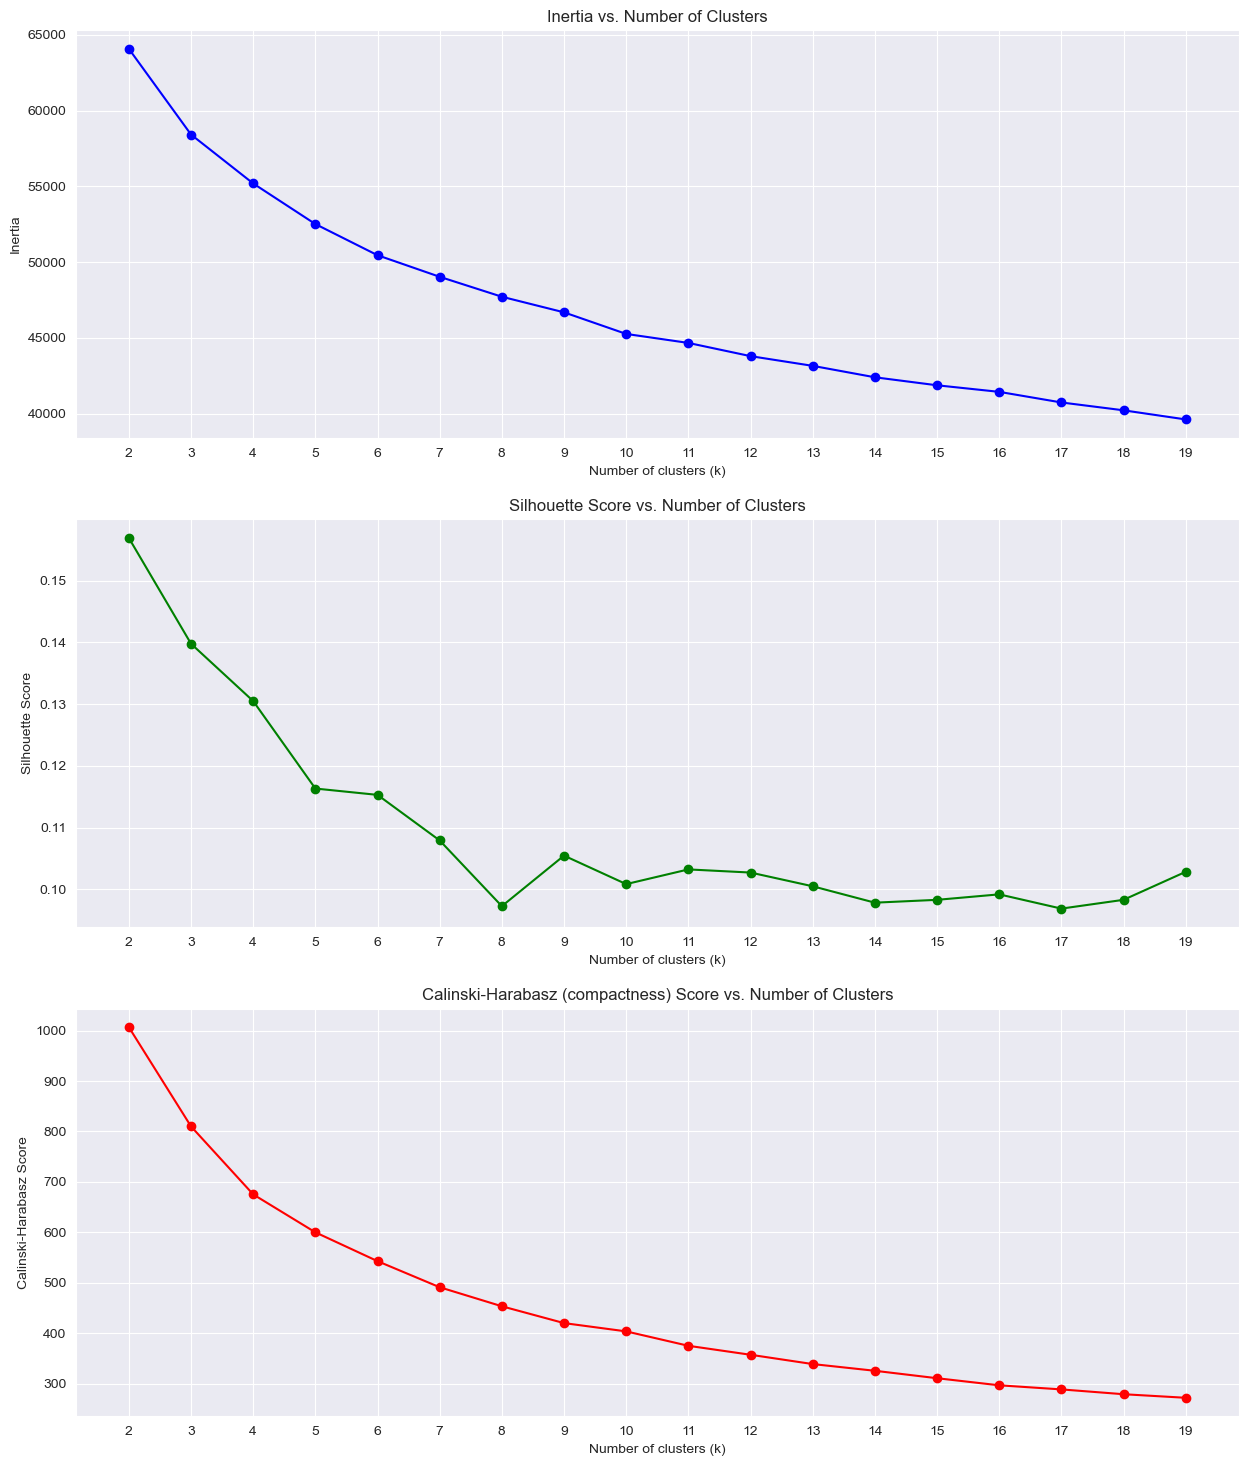

In [18]:
# 读取数据
# Read the data
url = 'https://raw.githubusercontent.com/ZhiyunXu20/INT104_Coursework2/main/dataframe_PCA.csv'
data = pd.read_csv(url)

# 保留需要的列
# Retain required columns
pca_data = data.drop(['Patient index', 'Label'], axis=1).values

# 迭代找出最适合的k值
# Iterate to find the most suitable k value
inertia = []
silhouette = []
compactness = []
k_values = range(2, 20)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)

    # 计算Inertia
    # Calculate Inertia
    inertia.append(kmeans.inertia_)

    # 计算Silhouette Score
    # Calculate Silhouette Score
    silhouette.append(silhouette_score(pca_data, kmeans.labels_))

    # 计算Calinski-Harabasz Score
    # Calculate Calinski-Harabasz Score
    compactness.append(calinski_harabasz_score(pca_data, kmeans.labels_))

# 可视化不同的指标：Silhouette，Compactness，Inertia
# Visualize different indicators: Silhouette, Compactness, Inertia
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 18))

ax1.plot(k_values, inertia, 'bo-')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Inertia vs. Number of Clusters')
ax1.set_xticks(k_values)  # 添加所有k值到横轴

ax2.plot(k_values, silhouette, 'go-')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs. Number of Clusters')
ax2.set_xticks(k_values)  # 添加所有k值到横轴

ax3.plot(k_values, compactness, 'ro-')
ax3.set_xlabel('Number of clusters (k)')
ax3.set_ylabel('Calinski-Harabasz Score')
ax3.set_title('Calinski-Harabasz (compactness) Score vs. Number of Clusters')
ax3.set_xticks(k_values)  # 添加所有k值到横轴

plt.show()



/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/an

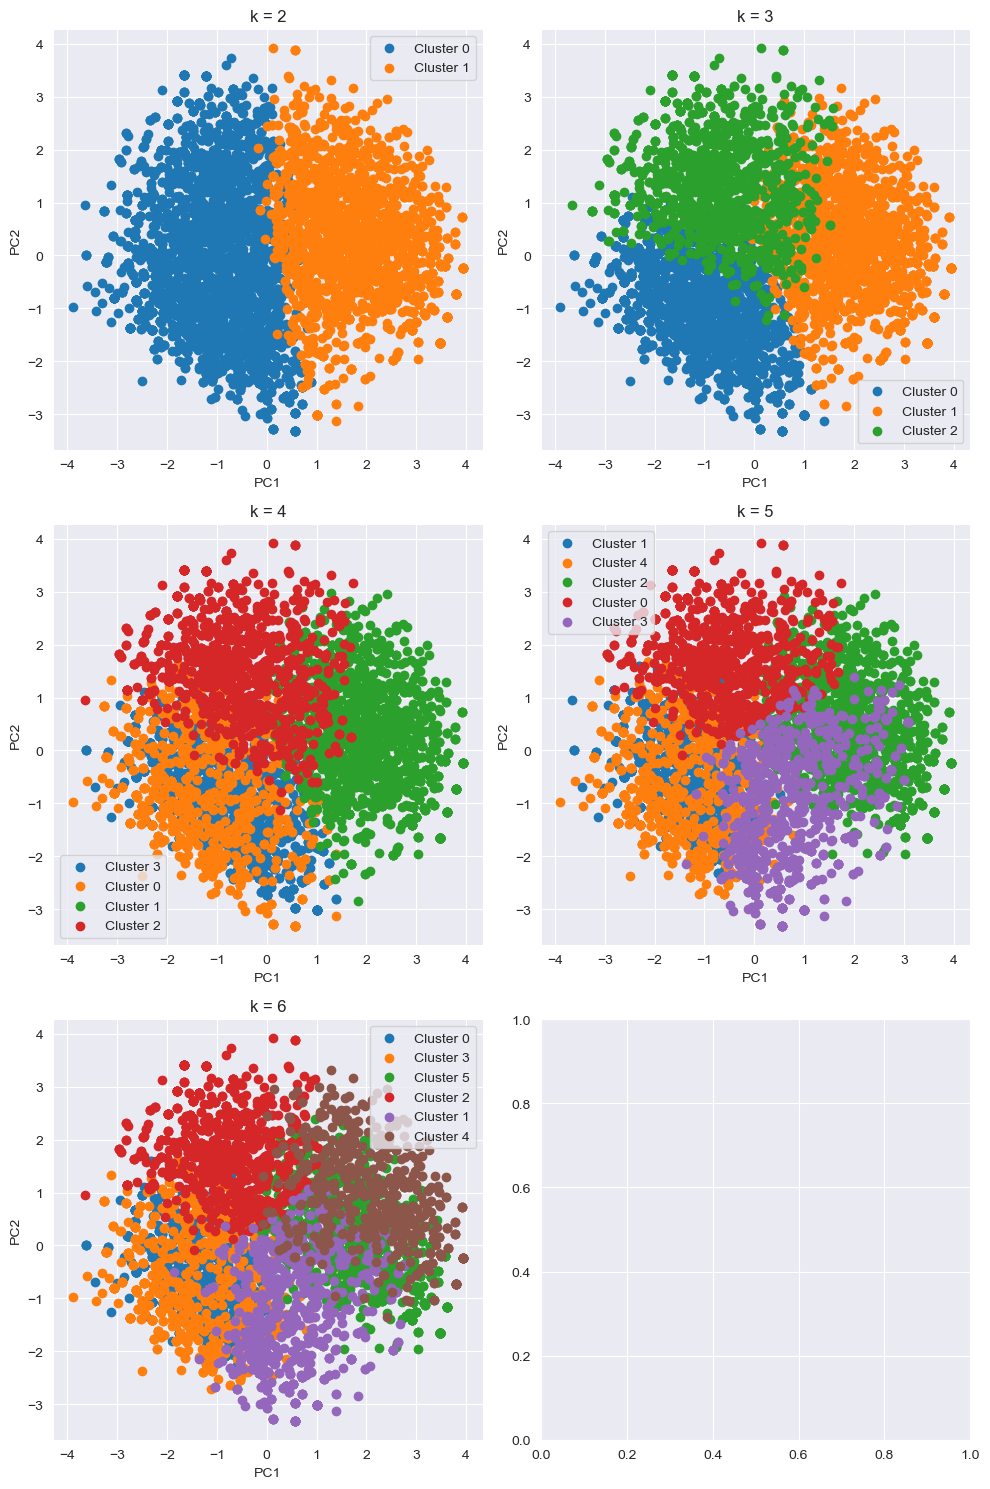

In [21]:
k_values = [2, 3, 4, 5, 6]
dfs = []

# 对每个k值进行聚类，并将结果添加到新的DataFrame中
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_data)

    # 创建新的DataFrame，并添加'label'列
    new_df = pd.DataFrame(pca_data, columns=data.drop(['Patient index', 'Label'], axis=1).columns)
    new_df['label'] = labels
    dfs.append(new_df)

# 使用PCA将13个主成分降维至2个
pca_2d = PCA(n_components=2)
principal_components_2d = pca_2d.fit_transform(pca_data)

# 绘制每个k值对应的聚类结果散点图
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
axes = axes.ravel()

for i, k in enumerate(k_values):
    ax = axes[i]
    df_2d = pd.DataFrame(principal_components_2d, columns=['PC1', 'PC2'])
    df_2d['label'] = dfs[i]['label']

    for label in df_2d['label'].unique():
        ax.scatter(df_2d[df_2d['label'] == label]['PC1'], df_2d[df_2d['label'] == label]['PC2'], label=f'Cluster {label}')

    ax.set_title(f'k = {k}')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.legend()

plt.tight_layout()
plt.show()


In [23]:
# 保存k=2的结果
dfs[0].to_csv('k2_clustering_results.csv', index=False)

# 保存k=3的结果
dfs[1].to_csv('k3_clustering_results.csv', index=False)

In [ ]:
# # 根据图像选择最适合的k值
# # Choose the most suitable k value based on the images
# optimal_k = 4
#
# # 使用最佳k值进行K-means聚类
# # Perform K-means clustering using the optimal k value
# kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
# kmeans_optimal.fit(pca_data)
#
# # 绘制聚类结果
# # Plot the clustering results
# plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_optimal.labels_, cmap='viridis')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.title(f'K-means Clustering with k = {optimal_k}')
# plt.show()
#
# # 对每个聚类计算平均值和标准差
# # Calculate mean and standard deviation for each cluster
# data['cluster'] = kmeans_optimal.labels_
# cluster_summary = data.groupby('cluster').agg(['mean', 'std']).transpose()
#
# # 展示聚类摘要
# # Display cluster summary
# print(cluster_summary)
#
# # 保存聚类结果到CSV文件
# # Save clustering results to a CSV file
# data.to_csv('clustering_results.csv', index=False)
